In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from MinorityGameComplex import GameSimulationImitationTermal

In [7]:
S=2
N=401
dynT = 100000

lenemes = 8
emes = np.arange(5,5+lenemes)
alpha=2**emes/N

nimis = np.array([100,400])
lenimis = len(nimis)

T=1000000
numponderas = 3
imprimecada = 1

sigma = np.zeros((lenimis, lenemes))
gains = np.zeros((lenimis, lenemes))
gains_imitators = np.zeros((lenimis, lenemes))

for m in range(lenemes):
    M = emes[m]
    for ncop in range(lenimis):
        Ncop = nimis[ncop]
        print(' ..............................')
        print('              M = {}     ({} / {})'.format(M, m+1, lenemes))
        print('           Ncop = {}     ({} / {})'.format(Ncop, ncop+1, lenimis))
        print(' ..............................')
        s = 0
        g = 0
        gc = 0
        for pond in range(numponderas):
            A, G, GC = GameSimulationImitationTermal(S, M, N, Ncop, T, dynT)
            s += np.var(A) / N
            g += np.mean(G)
            gc += np.mean(GC)
            if (pond + 1) % imprimecada == 0:
                print('        -Ponderacion nº {}/{}'.format(pond + 1, numponderas))
                print('             σ²/N = {}'.format(s / (pond + 1)))
                print('             <g>  = {}'.format(g / (pond + 1)))
                print('             <gi> = {}'.format(gc / (pond + 1)))
        sigma[ncop,m] =  s / numponderas
        gains[ncop,m] = g / numponderas
        gains_imitators[ncop,m] = gc / numponderas
        print('...Remembering...')
        print('Ncops = ', nimis[:(ncop+1)])
        print('σ²/N = ', sigma[:(ncop+1),m])
        print(' <g> = ', gains[:(ncop+1),m])
        print('<gi> = ', gains_imitators[:(ncop+1),m])

 ..............................
              M = 5     (1 / 8)
           Ncop = 100     (1 / 2)
 ..............................
        -Ponderacion nº 1/3
             σ²/N = 2.6712857057172177
             <g>  = -3.173370910299003
             <gi> = -1.1600092400000006
        -Ponderacion nº 2/3
             σ²/N = 2.7987201895130527
             <g>  = -3.3185489900332223
             <gi> = -1.2340355000000003
        -Ponderacion nº 3/3
             σ²/N = 2.836168219408023
             <g>  = -3.3568618648947948
             <gi> = -1.268880346666667
...Remembering...
Ncops =  [100]
σ²/N =  [2.83616822]
 <g> =  [-3.35686186]
<gi> =  [-1.26888035]
 ..............................
              M = 5     (1 / 8)
           Ncop = 400     (2 / 2)
 ..............................
        -Ponderacion nº 1/3
             σ²/N = 0.6226466234346533
             <g>  = -1.491976
             <gi> = -0.6204733
        -Ponderacion nº 2/3
             σ²/N = 0.6117759700678054
         

KeyboardInterrupt: 

In [4]:
for nc in range(len(nimis)):
    file_name = 'imiTATION_Sigma,GainImitator,GainALLvsNimitators_emes_' + str(N) +' N_' + str(
                                nimis[nc])+'Ncop_CG_' + str(dynT) + 'dynT_' +  str(
                                T)+'T_'+str(numponderas)+'numponds'
    with open('{}.dat'.format(file_name), 'w') as file:
        for i in range(len(alpha)):
            file.write('{} {} {} {}\n'.format(alpha[i], sigma[nc,i], gains[nc,i], gains_imitators[nc,i]))

In [79]:
"""S=2
N=401
lenemes = 8
lenimis = 5
T=10000
dynT = 1000
numponderas = 100
nimis = np.array([1,50,100,200,400])"""

"""S=2
N=401
lenemes = 8
lenimis = 5
T=10000
dynT = 100
numponderas = 15"""

S=2
N=401
lenemes = 8
lenimis = 4
T=5000
dynT = 1
numponderas = 5
nimis = np.array([1,50,100,200])

alpha0 = np.zeros((lenemes))
sigma0 = np.zeros((lenimis, lenemes))
gains0 = np.zeros((lenimis, lenemes))
gains_imitators0 = np.zeros((lenimis, lenemes))

for nc in range(lenimis):
    file_name = 'imiTATION_Sigma,GainImitator,GainALLvsNimitators_emes_' + str(N) +' N_' + str(
                                nimis[nc])+'Ncop_CG_' + str(dynT) + 'dynT_' + str(
                                T)+'T_'+str(numponderas)+'numponds'
    with open('{}.dat'.format(file_name), 'r') as file:
        i = 0
        for line in file:
            value = line.split()
            value[3].split('\n')
            if nc == 0:
                alpha0[i] = float(value[0])
            sigma0[nc, i] = float(value[1])
            gains0[nc, i] = float(value[2])
            gains_imitators0[nc, i] = float(value[3])
            i += 1

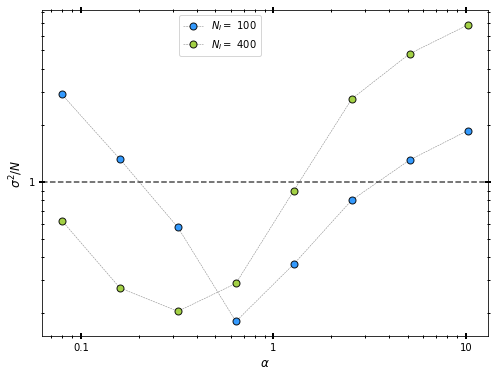

In [6]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim([0,4.6])
ax.set_xlabel(r'$\alpha$', fontsize='large')
ax.set_ylabel(r'$\sigma^2/N$', fontsize='large')

ax.tick_params(which='minor', direction = 'inout', length=3, width=1,
              labelbottom=False, labeltop=False, labelleft=False, labelright=False,
                  bottom=True, top=True, left=True, right=True)

ax.tick_params(which='major', direction = 'inout', length=6, width = 2,
                  labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                  bottom=True, top=True, left=True, right=True)

cols = ['dodgerblue', 'yellowgreen', 'crimson', 'forestgreen']

lin = ['1','2','3','4','5']
mark = ['1','2','3','4','5']
for nc in range(lenimis):
    lin[nc], = ax.plot(alpha, sigma[nc], lw=0.5, ls = '--', color = 'k', alpha=0.5)
    mark[nc], = ax.plot(alpha, sigma[nc], ls = '', marker = 'o', mec='k',mfc=cols[nc],
                     ms = 7, mew = 1, alpha=0.9)


yticks1 = [1]
ax.set_yticks(yticks1)
ax.set_yticklabels([str(i) for i in yticks1])

xticks1 = [0.1, 1, 10]
ax.set_xticks(xticks1)
ax.set_xticklabels([str(i) for i in xticks1])

ax.axhline(y=1, xmin=0, xmax=1, color='k', alpha=0.7, linestyle='--')

labels = [(r'$N_I=$ '+str(nimis[i])) for i in range(lenimis)]
ax.legend([(lin[i], mark[i]) for i in range(lenimis)], 
          labels, loc='upper center', bbox_to_anchor=[0.4,1],)


filename = 'imitationCG_SIGMAvsALPHA' + str(
                    N) +' N_' + '1Ncop_'+ str(
                    dynT) + 'dynT_' + str(T)+'T_'+str(numponderas)+'numponds.png'
#fig.savefig(filename, bbox_inches='tight')

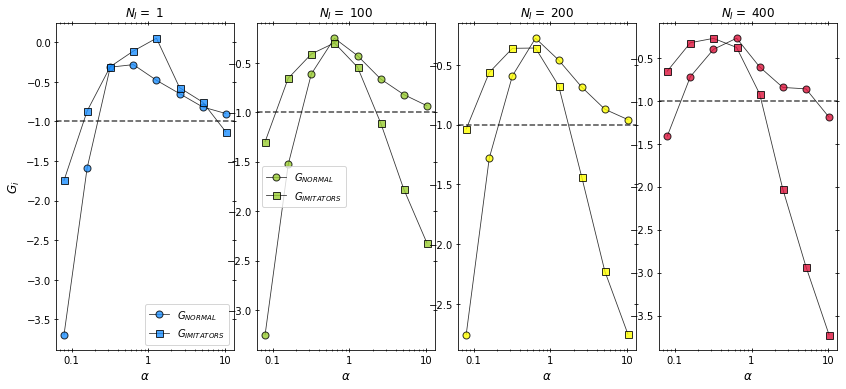

In [19]:
fig, ax = plt.subplots(1, lenimis, figsize=(14,6))
fig.subplots_adjust(wspace=0.13)

cols = ['dodgerblue', 'yellowgreen', 'yellow', 'crimson', 'forestgreen']
labels = [(r'$N_I = $ ' + str(i)) for i in nimis]
i = -1
for nc in range(len(nimis)):
    i += 1
    ax[i].tick_params(which='both', direction='inout', labelbottom=True, 
                   labeltop=False, labelleft=True, labelright=False,
                   bottom=True, top=True, left=True, right=True)
    """ax[i].yaxis.set_major_locator(MultipleLocator(1))
    ax[i].yaxis.set_minor_locator(MultipleLocator(0.5))"""
    
    ax[i].set_xscale('log')
    ax[i].set_xlabel(r'$\alpha$', fontsize='large')
    ax[i].set_title(r'$N_I = $ ' + str(nimis[nc]))
    #ax[i].set_ylim([-8,0.8])
    ax[i].plot(alpha, gains[nc], lw=.8, ls = '-', color = 'k', alpha=0.8,
             marker='o', mec = 'k', mfc=cols[nc], mew = 1, ms = 7, label=r'$G_{NORMAL}$')
    ax[i].plot(alpha, gains_imitators[nc], lw=.8, ls = '-', color = 'k', alpha=0.8,
             marker='s', mec = 'k', mfc=cols[nc], mew = 1, ms = 7, label=r'$G_{IMITATORS}$')
    
    ax[i].axhline(y=-1, xmin=0, xmax=1, color='k', alpha=0.7, linestyle='--')
    xticks1 = [0.1, 1, 10]
    ax[i].set_xticks(xticks1)
    ax[i].set_xticklabels([str(i) for i in xticks1])

ax[0].tick_params(which='both', direction='inout', labelbottom=True, 
                   labeltop=False, labelleft=True, labelright=False,
                   bottom=True, top=True, left=True, right=True)
ax[0].set_ylabel(r'$G_i$', fontsize='large')

"""yticks1 = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
ax.set_yticks(yticks1)
ax.set_yticklabels([str(i) for i in yticks1])"""

ax[0].legend(loc='lower right')
ax[1].legend(loc='center left')


filename = 'imitationCG_GAINSvsALPHA' + str(
                    N) +'N_' + 'Ncop_CG_' + str(
                    dynT) + 'dynT_' + str(T)+'T_'+str(numponderas)+'numponds.png'
#fig.savefig(filename, bbox_inches='tight')